In [1]:
# reprise du code de Aurélian sur les industries polluantes mais avec superposition avec les carreaux Filosofi 2019
!pip install contextily
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 8.0 MB/s  0:00:026m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [contextily]9 [geopy]io]clib]


In [2]:
#### On importe le fichier répertoriant les installations industrielles rejetant des polluants

import requests

# Téléchargement du fichier avec la localisation des installations industrielles rejetant des polluants, directement depuis le site Géorisques
url_industries_polluantes = "https://files.georisques.fr/irep/2023.zip"
response_industries_polluantes = requests.get(url_industries_polluantes)

# Enregistrement du fichier localement
with open("Industries_polluantes.xlsx", "wb") as f:
    f.write(response_industries_polluantes.content)

In [3]:
import pandas as pd
import zipfile

with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/etablissements.csv") as f:
        industries_polluantes = pd.read_csv(f, sep=None, engine='python')

# On renomme la colonne insee dès maintenant (pour harmoniser ensuite)
industries_polluantes = industries_polluantes.rename(columns={"code_insee" : "insee"})
industries_polluantes.head()


,identifiant,nom_etablissement,numero_siret,adresse,code_postal,insee,commune,code_departement,departement,code_region,region,coordonnees_x,coordonnees_y,code_epsg,code_ape,libelle_ape,code_eprtr,libelle_eprtr
0,6101975,COFIBEX,43425026200012,AVENUE DE LA LIBERATION ZONE INDUSTRIELLE,1500,01004,AMBERIEU-EN-BUGEY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.33551,45.96163,4326.0,6420Z,Activités des sociétés holding,NaN,NaN
1,9000321,AIA Ambrieu en Bugey,15000028900135,avenue du colonel CHAMBONNET Base arienne 278,1508,01004,AMBERIEU-EN-BUGEY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.34592,45.97117,4326.0,8422Z,Défense,NaN,NaN
2,6100021,THIERRY DANNENMULLER TRANSPORTS LOCATIONS TRAV...,35234119200065,LE PELOUX CARRIERE D'AMBRONAY LE PELOUX,1500,01007,AMBRONAY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.34282,46.02817,4326.0,0811Z,Extraction de pierres ornementales et de const...,NaN,NaN
3,3202489,SOCIETE BRESSANE DE STOCKAGE ET DE CHARGEMENT,34408383700015,GARE,1500,01007,AMBRONAY,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.35873,46.00535,4326.0,5224B,Manutention non portuaire,NaN,NaN
4,6101980,FERROGLOBE FRANCE,64200517700265,ROUTE DE LA GARE,1350,01010,ANGLEFORT,01,AIN,84.0,AUVERGNE-RHONE-ALPES,5.81144,45.90610,4326.0,2410Z,Sidérurgie,2.(e).(i),destinées à la production de métaux bruts non ...


In [4]:
with zipfile.ZipFile("Industries_polluantes.xlsx", "r") as z:
    with z.open("2023/rejets.csv") as f:
        rejets = pd.read_csv(f, sep=None, engine='python')

rejets = rejets.rename(columns = {"code_insee" : "insee"})

rejets.head()

,identifiant,nom_etablissement,code_postal,insee,commune,code_departement,departement,code_region,region,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,3012489,CARRIERES & MATERIAUX NORD-EST,51150,51303,JALONS,51,MARNE,44,GRAND-EST,2023,NaN,167850.0
1,3012512,ETABLISSEMENTS BLANDIN SA,51300,51433,PLICHANCOURT,51,MARNE,44,GRAND-EST,2023,NaN,59277.0
2,3012705,KNAUF INSULATION LANNEMEZAN,57970,57343,ILLANGE,57,MOSELLE,44,GRAND-EST,2023,0.0,0.0
3,3013146,METABOLIC EXPLORER,57500,57606,SAINT-AVOLD,57,MOSELLE,44,GRAND-EST,2023,55597.0,NaN
4,3014130,AFYREN NEOXY,57500,57606,SAINT-AVOLD,57,MOSELLE,44,GRAND-EST,2023,7647.0,NaN


In [5]:
# on merge les deux tables
etablissements_rejets = pd.merge(industries_polluantes, rejets, on=["identifiant", "nom_etablissement", "code_postal", "insee",
"commune", "code_departement", "departement", "code_region", "region"], how="inner")
etablissements_rejets.head()

,identifiant,nom_etablissement,numero_siret,adresse,code_postal,insee,commune,code_departement,departement,code_region,...,coordonnees_x,coordonnees_y,code_epsg,code_ape,libelle_ape,code_eprtr,libelle_eprtr,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an
0,6101980,FERROGLOBE FRANCE,64200517700265,ROUTE DE LA GARE,1350,01010,ANGLEFORT,01,AIN,84.0,...,5.81144,45.90610,4326.0,2410Z,Sidérurgie,2.(e).(i),destinées à la production de métaux bruts non ...,2023,NaN,2253116.0
1,6101989,KEM ONE,53869504000039,258 ROUTE DE SAINT MAURICE DE GOURDANS SITE IN...,1360,01027,BALAN,01,AIN,84.0,...,5.10000,45.84721,4326.0,2014Z,Fabrication d'autres produits chimiques organi...,4.(a).(viii),"matières plastiques de base (polymères, fibres...",2023,NaN,685463.0
2,6112329,SK FUNCTIONAL POLYMER,87995793400059,258 ROUTE DE ST MAURICE DE GOURDANS,1360,01027,BALAN,01,AIN,84.0,...,5.10000,45.84721,4326.0,2016Z,Fabrication de matières plastiques de base,4.(a).(viii),"matières plastiques de base (polymères, fibres...",2023,NaN,94045.0
3,6108136,ELIAN,76020009700060,570 RUE DE L'ANGE ZI SUD PLASTICS VALLEE BP5,1100,01031,BELLIGNAT,01,AIN,84.0,...,5.62876,46.24919,4326.0,2012Z,Fabrication de colorants et de pigments,NaN,NaN,2023,1866.0,NaN
4,6102002,SYND INTERCOMMUNAL DE VALORISATION,25740162000030,5 CHEMIN DE TAPEY ZI D ARLOD,1200,01033,BELLEGARDE-SUR-VALSERINE,01,AIN,84.0,...,5.81411,46.08494,4326.0,3821Z,Traitement et élimination des déchets non dang...,5.(b),Installations destinées à l'incinération des d...,2023,NaN,25903484.0


In [6]:
# on doit transformer le csv en géodataframe en transformant les colonnes x et y en géométries
import geopandas as gpd


# Conversion en points géographiques
gdf_etab = gpd.GeoDataFrame(
    etablissements_rejets,
    geometry=gpd.points_from_xy(etablissements_rejets.coordonnees_x, etablissements_rejets.coordonnees_y),
    crs="EPSG:2154"
)


In [7]:
# on importe les carreaux de Filosofi carroyé 1km/1km depuis le site de l'Insee
import requests

url = "https://www.insee.fr/fr/statistiques/fichier/7655464/Filosofi2019_carreaux_1km_gpkg.zip"
response = requests.get(url)

with open("Filosofi2019_carreaux_1km_gpkg.zip", "wb") as f:
    f.write(response.content)


In [8]:
import zipfile

with zipfile.ZipFile("Filosofi2019_carreaux_1km_gpkg.zip", "r") as z:
    z.extractall("carreaux_gpkg")   # crée un dossier


In [9]:
import os
os.listdir("carreaux_gpkg")


['Filosofi2019_carreaux_1km_gpkg.7z']

In [11]:
!pip install py7zr
import py7zr
import os

# Chemin du 7z imbriqué
sevenzip_path = "carreaux_extraits/Filosofi2019_carreaux_1km_gpkg.7z"

# Répertoire où extraire ce 7z
extract_dir_7z = "carreaux_extraits/final"

# Extraire le 7z
with py7zr.SevenZipFile(sevenzip_path, mode='r') as archive:
    archive.extractall(path=extract_dir_7z)

# Lister les fichiers extraits
print(os.listdir(extract_dir_7z))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.5 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.6 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [py7zr]32m8/9 [py7zr]todomex]
['carreaux_1km_met.gpkg', 'carreaux_1km_reun.gpkg', 'carreaux_1km_mart.gpkg']


In [15]:
# !pip install fiona
# import fiona
# import geopandas as gpd

gpkg_path = "carreaux_extraits/final/carreaux_1km_met.gpkg" 

layers = fiona.listlayers(gpkg_path)
print(layers)

carreaux = gpd.read_file(gpkg_path, layer=layers[0])
print(carreaux.head())


['carreaux_1km_met']
                         idcar_1km  i_est_1km lcog_geo   ind  men  men_pauv  \
0  CRS3035RES1000mN2029000E4252000          1    2A041   3.0  1.4       0.3   
1  CRS3035RES1000mN2029000E4254000          1    2A041   2.0  0.9       0.2   
2  CRS3035RES1000mN2030000E4252000          1    2A041   6.0  2.5       0.3   
3  CRS3035RES1000mN2030000E4253000          1    2A041  16.5  6.9       0.7   
4  CRS3035RES1000mN2030000E4254000          1    2A041   5.0  2.4       0.5   

   men_1ind  men_5ind  men_prop  men_fmp  ...  ind_6_10  ind_11_17  ind_18_24  \
0       0.5       0.1       0.8      0.1  ...       0.2        0.2        0.3   
1       0.3       0.0       0.5      0.0  ...       0.1        0.1        0.2   
2       0.3       0.1       1.6      0.5  ...       0.1        0.5        0.3   
3       1.0       0.3       4.3      1.3  ...       0.3        1.3        1.0   
4       0.9       0.1       1.4      0.1  ...       0.2        0.4        0.5   

   ind_25_39  ind

In [23]:
# jointure spatiale pour savoir quels carreaux contiennent au moins un point industrie
carreaux_indus = gpd.sjoin(
    carreaux,
    gdf_etab,
    how='left',
    predicate='intersects'
)



In [25]:
# 2) Agréger par carreau : nombre d’industries + somme des rejets
carreaux_indus["rejet_isole_par_carreau"] = (
    carreaux_indus.groupby(carreaux_indus.index)["rejet_isole_m3_par_an"]
    .transform("sum")
)



<Axes: >

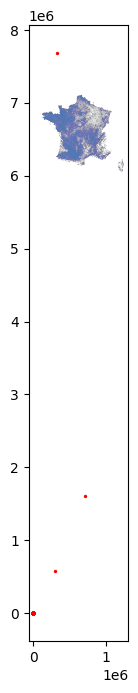

In [28]:
ax = carreaux.plot(figsize=(8,8), alpha=0.3)
gdf_etab.plot(ax=ax, color="red", markersize=2)


In [29]:
gdf_etab.total_bounds


array([-6.166814e+01, -2.132500e+01,  7.166790e+05,  7.682383e+06])

In [34]:
# Sélection des points "WGS84" par coordonnées
gdf_wgs = gdf_etab[
    (gdf_etab.geometry.x.between(-10, 10)) &
    (gdf_etab.geometry.y.between(40, 60))
].copy()

# Forcer la bonne attribution de CRS
gdf_wgs = gdf_wgs.set_crs(4326, allow_override=True)

# Reprojection vers Lambert 93
gdf_wgs = gdf_wgs.to_crs(2154)


In [35]:
gdf_l93 = gdf_etab[
    (gdf_etab.geometry.x > 100) & (gdf_etab.geometry.y > 1_000_000)
].copy()

# Ici on suppose que le CRS est déjà bon
gdf_l93 = gdf_l93.set_crs(2154, allow_override=True)


In [36]:
gdf_etab_fixed = pd.concat([gdf_l93, gdf_wgs], ignore_index=True)


In [37]:
print(gdf_etab_fixed.crs)


EPSG:2154


In [38]:
print(gdf_etab_fixed.total_bounds)


[ 137704.39413097 1613392.         1233835.65151872 7682383.        ]


In [19]:
# Fusionner l’agrégation avec la table des carreaux : cela garde toutes les colonnes socio-éco des carreaux
carreaux_final = carreaux.join(aggregation)


In [20]:
# on remplace les valeurs manquantes par 0
carreaux_final["nb_industries"] = carreaux_final["nb_industries"].fillna(0).astype(int)
carreaux_final["rejet_isole_par_carreau"] = carreaux_final["rejet_isole_par_carreau"].fillna(0)

# carreaux_final contient toutes les colonnes originales des carreaux ; nb_industries = nombre d’établissements dans le carreau
# rejet_isole_par_carreau = somme des rejets isolés ; 0 pour les carreaux sans industrie ; géométrie conservée 


<Axes: >

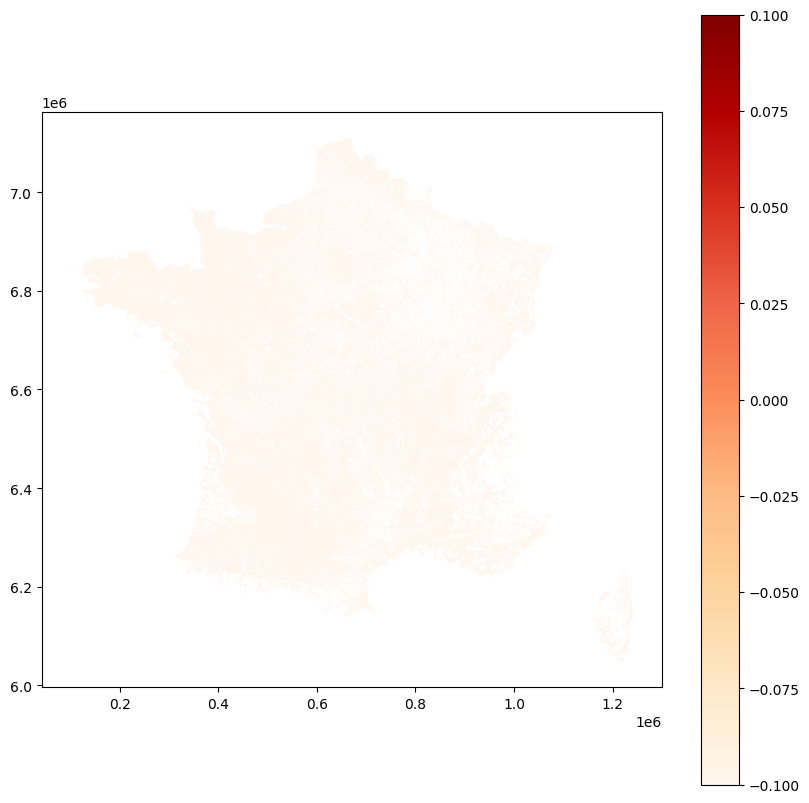

In [21]:
carreaux_final.plot(
    column="rejet_isole_par_carreau",
    cmap="OrRd",
    legend=True,
    figsize=(10,10)
)


In [22]:
carreaux_final["rejet_isole_par_carreau"].describe()
carreaux_final["rejet_isole_par_carreau"].value_counts().head(20)


rejet_isole_par_carreau
0.0    374027
Name: count, dtype: int64

In [28]:
# La colonne index_right sera NaN s’il n’y a pas d’industrie dans le carreau, sinon un index.
carreaux_indus['pollue'] = carreaux_indus['index_right'].notna().astype(int)
carreaux_indus.head()

,idcar_1km,i_est_1km,lcog_geo,ind,men,men_pauv,men_1ind,men_5ind,men_prop,men_fmp,...,coordonnees_y,code_epsg,code_ape,libelle_ape,code_eprtr,libelle_eprtr,annee_rejet,rejet_raccorde_m3_par_an,rejet_isole_m3_par_an,pollue
0,CRS3035RES1000mN2029000E4252000,1,2A041,3.0,1.4,0.3,0.5,0.1,0.8,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,CRS3035RES1000mN2029000E4254000,1,2A041,2.0,0.9,0.2,0.3,0.0,0.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,CRS3035RES1000mN2030000E4252000,1,2A041,6.0,2.5,0.3,0.3,0.1,1.6,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,CRS3035RES1000mN2030000E4253000,1,2A041,16.5,6.9,0.7,1.0,0.3,4.3,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,CRS3035RES1000mN2030000E4254000,1,2A041,5.0,2.4,0.5,0.9,0.1,1.4,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [31]:
carreaux_commune = carreaux[carreaux['lcog_geo'].str.contains(code_insee_commune)].copy()
indus_commune = gdf_etab[gdf_etab['insee'] == code_insee_commune].copy()

AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolor'

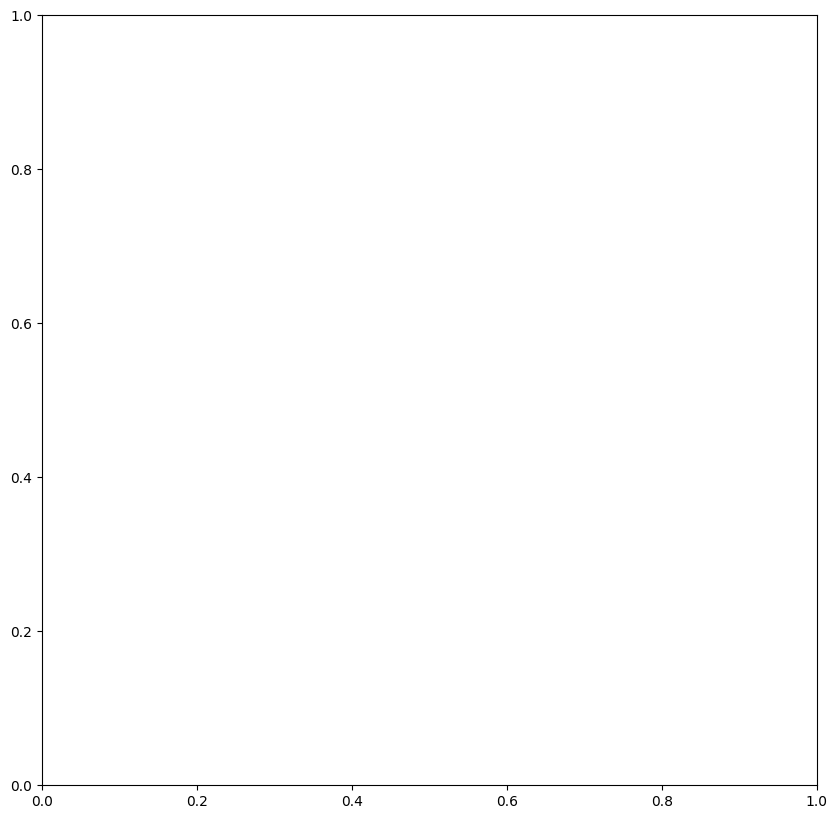

In [34]:
import matplotlib.pyplot as plt
import geopandas as gpd

code_insee_commune = "91228"  # Exemple pour la commune Évry-Courcouronnes

# Filtrer les carreaux par inclusion (attention au format de lcog_geo, adapte si besoin)
carreaux_commune = carreaux[carreaux['lcog_geo'] == code_insee_commune].copy()
indus_commune = gdf_etab[gdf_etab['insee'] == code_insee_commune].copy()

# Jointure spatiale
carreaux_indus_commune = gpd.sjoin(
    carreaux_commune,
    indus_commune,
    how='left',
    predicate='contains'
)

# Marquer les carreaux pollués
carreaux_indus_commune['pollue'] = carreaux_indus_commune['index_right'].notna().astype(int)

# Pour éviter les doublons de carreaux en cas de plusieurs industries dans un même carreau
carreaux_indus_commune = carreaux_indus_commune.groupby(carreaux_indus_commune.index).agg({
    'pollue': 'max',
    'geometry': 'first'
}).reset_index(drop=True)

# Palette manuelle pour deux classes : 0 = gris clair, 1 = rouge vif
colors = {0: 'lightgrey', 1: 'red'}

fig, ax = plt.subplots(figsize=(10,10))

# Ici on utilise bien geopandas.plot() en spécifiant ax
carreaux_indus_commune.plot(
    ax=ax,
    color=carreaux_indus_commune['pollue'].map(colors),
    edgecolor='black',    # correct ici
    linewidth=0.5
)

# Ajouter une légende manuelle
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='red', label='Carreaux pollués'),
    mpatches.Patch(color='lightgrey', label='Carreaux non pollués')
]
ax.legend(handles=legend_handles, loc='upper right')

ax.set_title(f"Carreaux pollués - Commune {code_insee_commune}")
ax.axis('off')
plt.show()




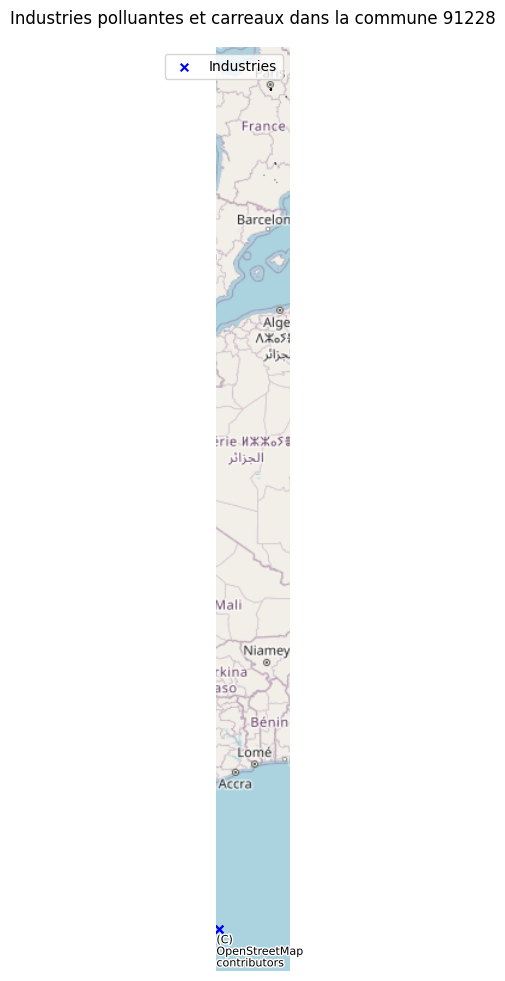

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Exemple pour la commune Évry-Courcouronnes (code INSEE 91228)
code_insee = "91228"

# Filtrer les carreaux de la commune (lcog_geo contient un code, il faut bien vérifier le format)
carreaux_commune = carreaux[carreaux['lcog_geo'].str.contains(code_insee)].copy()

# Filtrer les industries polluantes de la commune
indus_commune = gdf_etab[gdf_etab['insee'].str.startswith(code_insee)].copy()

# Créer une GeoDataFrame pour les industries si ce n'est pas encore fait
if not isinstance(indus_commune, gpd.GeoDataFrame):
    geometry = [Point(xy) for xy in zip(indus_commune.coordonnees_x, indus_commune.coordonnees_y)]
    indus_commune = gpd.GeoDataFrame(indus_commune, geometry=geometry, crs="EPSG:2154")

# Assurer que les deux GeoDataFrames sont dans la même projection (ici EPSG:2154)
carreaux_commune = carreaux_commune.to_crs(epsg=3857)  # Web Mercator pour contextily
indus_commune = indus_commune.to_crs(epsg=3857)

# Calculer la colonne pollue : True si le carreau contient au moins une industrie
carreaux_commune['pollue'] = carreaux_commune.geometry.apply(
    lambda poly: indus_commune.within(poly).any()
)

# Plot avec fond OSM
fig, ax = plt.subplots(figsize=(12, 12))

# Carreaux, colorés selon la pollution
carreaux_commune.plot(
    ax=ax, 
    column='pollue', 
    cmap='Reds', 
    alpha=0.6,
    edgecolor='k',
    legend=True,
    legend_kwds={'title': "Présence industrie polluante"}
)


# Points industries
indus_commune.plot(ax=ax, color='blue', markersize=30, marker='x', label='Industries')

# Ajouter un fond OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Ajuster l'affichage
ax.set_axis_off()
ax.set_title(f"Industries polluantes et carreaux dans la commune {code_insee}")
ax.legend()

plt.show()



/tmp/ipykernel_22973/2391093713.py:38: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  carreaux_commune[carreaux_commune['pollue']].plot(ax=ax, color='red', alpha=0.6, edgecolor='black')


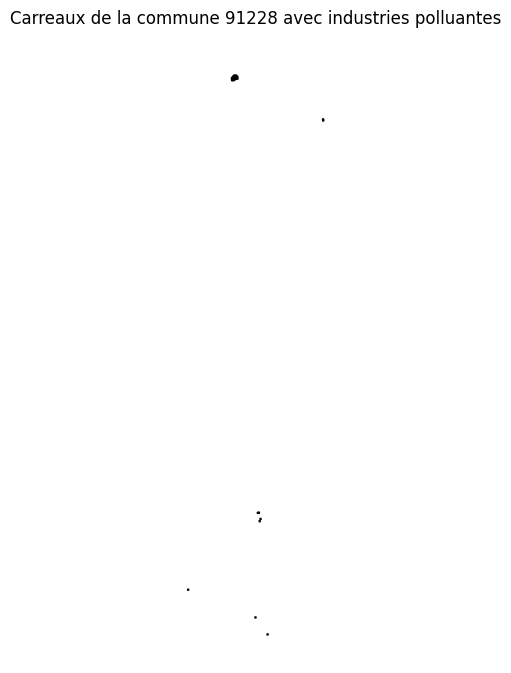

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Choisis ta commune INSEE, exemple '75056' (Paris)
code_insee_commune = '91228'

# Filtrer les carreaux de la commune (lcog_geo contient le code insee)
carreaux_commune = carreaux[carreaux['lcog_geo'].str.contains(code_insee_commune)]

# Filtrer les industries dans la commune
indus_commune = gdf_etab[gdf_etab['insee'] == code_insee_commune]

# Créer une colonne 'pollue' dans carreaux pour marquer les carreaux avec industrie
carreaux_commune = carreaux_commune.copy()
carreaux_commune['pollue'] = carreaux_commune['idcar_1km'].isin(
    indus_commune['idcar_1km'] if 'idcar_1km' in indus_commune.columns else []
)

# Si tu n’as pas de colonne idcar_1km dans industries, on peut faire un spatial join 
# pour déterminer quels carreaux contiennent au moins une industrie :

if indus_commune.empty:
    print("Pas d'industrie pour cette commune")
else:
    # Assure-toi que CRS est le même avant spatial join
    indus_commune = indus_commune.to_crs(carreaux_commune.crs)
    join = gpd.sjoin(carreaux_commune, indus_commune, predicate='contains', how='left')
    carreaux_commune['pollue'] = ~join['index_right'].isna()

# Plot

fig, ax = plt.subplots(figsize=(8,8))

# Carreaux gris clair
carreaux_commune.plot(ax=ax, color='lightgrey', edgecolor='black')

# Carreaux avec industrie polluante en rouge transparent
carreaux_commune[carreaux_commune['pollue']].plot(ax=ax, color='red', alpha=0.6, edgecolor='black')

ax.set_title(f"Carreaux de la commune {code_insee_commune} avec industries polluantes")
ax.set_axis_off()

plt.show()


/tmp/ipykernel_22973/2994223540.py:27: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  carreaux_commune[carreaux_commune['pollue']].plot(ax=ax, color='red', alpha=0.6, edgecolor='black')


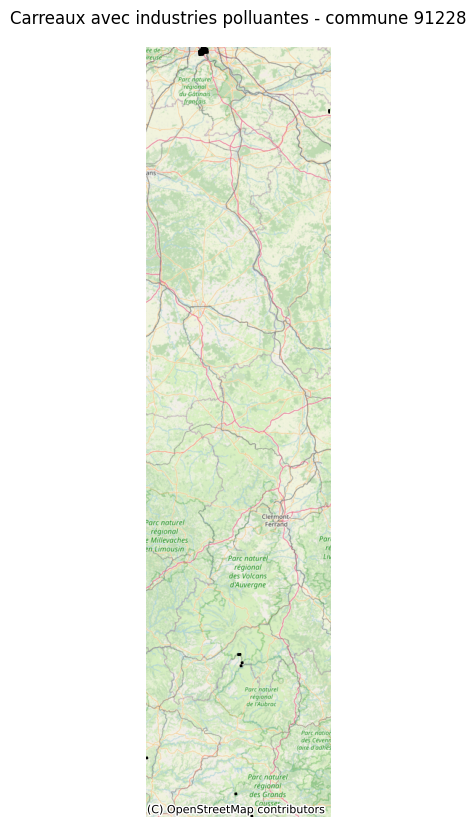

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Choix de la commune INSEE
code_insee_commune = '91228'  # Paris par exemple

# Filtrer carreaux et industries par commune
carreaux_commune = carreaux[carreaux['lcog_geo'].str.contains(code_insee_commune)].copy()
indus_commune = gdf_etab[gdf_etab['insee'] == code_insee_commune].copy()

# Vérifier et harmoniser CRS (on suppose que carreaux_commune et indus_commune sont en EPSG:2154)
carreaux_commune = carreaux_commune.to_crs(epsg=3857)
indus_commune = indus_commune.to_crs(epsg=3857)

# Spatial join pour marquer carreaux pollués
join = gpd.sjoin(carreaux_commune, indus_commune, predicate='contains', how='left')
carreaux_commune['pollue'] = ~join['index_right'].isna()

# Plot
fig, ax = plt.subplots(figsize=(10,10))

# Plot carreaux gris clair en fond
carreaux_commune.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot carreaux pollués en rouge semi-transparent
carreaux_commune[carreaux_commune['pollue']].plot(ax=ax, color='red', alpha=0.6, edgecolor='black')

# Ajouter fond OpenStreetMap via contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Ajuster limites selon carreaux (pour zoom)
ax.set_xlim(carreaux_commune.total_bounds[[0, 2]])
ax.set_ylim(carreaux_commune.total_bounds[[1, 3]])

ax.set_axis_off()
ax.set_title(f"Carreaux avec industries polluantes - commune {code_insee_commune}")

plt.show()
